# Transmission Line Fault Detection using Neural Network and Gradient Descent Optimization Algorithm

### Why Neural Networks?

![alt text](perceptron.jfif "Title")

A network of such **'perceptrons'** in multiple dimensions can create complex functions which can accurately represent the information given to the network

As seen in the diagram if we use different function like **sigmoid** we get the following functions:

##### 2 Dimensions
![alt text](sigmoid_1d.jfif "2 dimensions")
##### 3 Dimensions
![alt text](sigmoid_3d.gif "Title")

Our aim is to minimize a similar function but in higher dimensions

For **optimization of the function we compare 3 methods**, namely:

- Gradient Descent
![alt text](gd.png)
- ADAM : Adaptive Moment Estimation
![alt-text](adam_f.png)
- RMSprop : It is similar to gradient descent but an initial velocity is given to the particle
![alt-text](rms.png)

# Python Code
-![alt-text](arch_f.jpeg)

### Loading Dataset

We load the dataset from an excel file
Here we give labels to all fault classes

1. **External Postive-Pole** 
2. **External Negative-Pole** 
3. **Internal Positive-Pole**
4. **Internal Negative-Pole** 
5. **2 Pole Short Circuit** 

In [2]:
######### BLOCK 1 #########

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

train = pd.read_excel('data_column_train_matlab.xlsx')
train_data = train.to_numpy()
label = pd.read_excel('data_label_trian_matlab.xlsx')
label_data = label.to_numpy()
final_data = np.concatenate((train_data,label_data),axis =1)

### Data pre-processing

Data is processed in the form of **matrices**
For every input sample we give a label as well so that the classifier can calculate it's deviation

If the sample is of class 1 then the label looks like:

  1 0 0 0 0

In [3]:
######### BLOCK 2 #########

shuffled_data = np.random.shuffle(final_data)
df = pd.DataFrame(data=final_data)
X_train = final_data[:,0:32]
Y_train = final_data[:,32:]
m = X_train.shape[0]
layer_dims = [32,10,5]
X_train = (X_train-X_train.mean())/X_train.std()

test = pd.read_excel('Test sample set.xlsx')
test1 = test.drop(['fault types'],axis=1)

test2 = test1.drop(['test results'],axis=1)
test3 = test2.to_numpy()
X_test = test3[:,1:]
Y_test = test3[:,0:1]
X_test = (X_test-X_test.mean())/(X_test.std())

m = Y_test.shape[0]
Y_one_hot = np.zeros((m,5))
for i in range(m):
    j = int(Y_test[i])
    Y_one_hot[i,j-1] = Y_one_hot[i,j-1] + 1

test_pred = []
for i in Y_test:
    if i == 1:
        test_pred.append('External Postive-Pole')
    if i == 2:
        test_pred.append('External Negative-Pole')
    if i == 3:
        test_pred.append('Internal Positive-Pole')
    if i == 4:
        test_pred.append('Internal Negative-Pole')
    if i == 5:
        test_pred.append('2 Pole Short Circuit')
        
print(X_train.shape)    

(327, 32)


### Initializing the parameters

Here all the parameters (also called the **weights** of the neural network) which we need to optimize are initialized to a **random number**
.Biases(b) are initalized to **0**.

array([[1.],
       [1.],
       [2.],
       [2.],
       [3.],
       [4.],
       [5.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [5.],
       [5.],
       [5.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],

In [4]:
######### BLOCK 3 #########

def initialize_parameters(layer_dims,optimizer):
    #layer1=32
    #layer2=10
    #layer3=5
    parameters={}
    L = len(layer_dims)
    np.random.seed(1)
    
    if optimizer == 'ADAM':
        for l in range(1,L):
            parameters['W'+str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
            parameters['b'+str(l)] = np.zeros((layer_dims[l],1))
            parameters['Vdw'+str(l)] = np.zeros((layer_dims[l],layer_dims[l-1]))
            parameters['Vdb'+str(l)] = np.zeros((layer_dims[l],1))
            parameters['Sdw'+str(l)] = np.zeros((layer_dims[l],layer_dims[l-1]))
            parameters['Sdb'+str(l)] = np.zeros((layer_dims[l],1))
            parameters['Vdw_corrected'+str(l)] = np.zeros((layer_dims[l],layer_dims[l-1]))
            parameters['Vdb_corrected'+str(l)] = np.zeros((layer_dims[l],1))
            parameters['Sdw_corrected'+str(l)] = np.zeros((layer_dims[l],layer_dims[l-1]))
            parameters['Sdb_corrected'+str(l)] = np.zeros((layer_dims[l],1))
    if optimizer == 'Gradient Descent':
        for l in range(1,L):
            parameters['W'+str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
            parameters['b'+str(l)] = np.zeros((layer_dims[l],1))
    if optimizer == 'RMSprop':
        for l in range(1,L):
            parameters['W'+str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
            parameters['b'+str(l)] = np.zeros((layer_dims[l],1))
            parameters['Vdw'+str(l)] = np.zeros((layer_dims[l],layer_dims[l-1]))
            parameters['Vdb'+str(l)] = np.zeros((layer_dims[l],1))

        
    return parameters

### Activation Functions



In [5]:
######### BLOCK 4 #########

# helper function
def relu(x):
    '''
    return np.maximum(0,matrix)
    '''
    # np.where(matrix > 0, matrix, matrix * 0.01)
    y1 = ((x > 0) * x)                                                 
    y2 = ((x <= 0) * x * 0.01)                                         
    leaky_way2 = y1 + y2
    return leaky_way2
    
def sigmoid(matrix):
    return 1/(1+np.exp(-matrix))

def softmax(matrix):
    e_x = np.exp(matrix - np.max(matrix))
    return e_x/e_x.sum(axis=0)

def relu_derivative(x):
    
    x[x<0] = 0.01
    x[x>=0] = 1
    
    return x

def sigmoid_derivative(x):
    df = sigmoid(x)
    return df*(1-df)

### Forward Propogation
Input values are stored in a matrix labeled as X_train

Forward Propogation is basically caclulation of the output value.
-**Sigmoid Function**
![alt-text](sigmoid_f.jpeg)
-**Softmax Function**
![alt-text](sofmax_f.jpeg)
The output is then used to calcuate the **objective function**.

In [6]:
######### BLOCK 5 #########
def forward_propogation(parameters,X_train):
    
    cache = {}
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = W1@X_train.T + b1                   #loss func = sigmoid(W2@(relu(W1@X_train.T + b1))+b2)
    A1 = sigmoid(Z1)
    Z2 = W2@A1 + b2
    A2 = softmax(Z2)
    
    #assert(A2.shape == (1, X_train.shape[1]))

    cache = {'Z1':Z1,'A1':A1,'Z2':Z2,'A2':A2}
    return cache


### Calculation of the objective function

The objective function is **Binary Cross Entropy**

**J = Y_train * log(softmax(W2 * (sigmoid(W1 * X_train.T + b1))+b2))**
![alt-text](cost.jpeg)

Here
- Y_train - labeled data
- W1, W2 are matrices
- b1 and b2 rel values

In [7]:
######### BLOCK 6 #########

def compute_cost(lambd,cache,parameters,X_train,Y_train):
    W1 = parameters['W1']
    W2 = parameters['W2']
    A2 = cache['A2']
    m = X_train.shape[0]
     
    cross_entropy = -np.mean(Y_train*np.log(A2.T+np.exp(-8)))
    L2_cost = (np.sum(np.square(W1))+np.sum(np.square(W2))) *np.divide(lambd,2*m)
    cost = cross_entropy + L2_cost
    cost = np.squeeze(cost)
    #assert(isinstance(cost, float))
    return cost


### Calculating gradients for Gradient Descent

In [9]:
######### BLOCK 7 #########

def backward_propogation(lambd,cache,parameters,Y_train,X_train):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    Z1 = cache['Z1']
    A1 = cache['A1']
    Z2 = cache['Z2']
    A2 = cache['A2']
    m = X_train.shape[0]
    gradients = {}
    
    dZ2 = A2 - Y_train.T
    dW2 = (1/m)*dZ2@A1.T+(lambd/m)*W2
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = W2.T@dZ2*sigmoid_derivative(Z1)
    dW1 = (1/m)*dZ1@X_train+(lambd/m)*W1
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    gradients = {'dZ2':dZ2,'dW2':dW2,'db2':db2,'dZ1':dZ1,'dW1':dW1,'db1':db1}
    
    return gradients




### Implementing Gradient Descent

- W(i+1) = W(i) + learning_rate * gradient of W(i)
- b(i+1) = b(i) + learning_rate * gradient of b(i)

In [86]:
def optimize(lambd,parameters,gradients,learning_rate,optimizer):#layer_dims
    L = len(layer_dims)
    #Vdw = 0
    #Vdb = 0
    #Sdw = 0
    #Sdb = 0
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 0.00000001
    #L = len(parameters)//2
    
    if optimizer == 'ADAM':
    
        for l in range(L-1):

            parameters['Vdw'+str(l+1)] = beta1*parameters['Vdw'+str(l+1)] +(1-beta1)*gradients['dW'+str(l+1)]
            parameters['Vdb'+str(l+1)] = beta1*parameters['Vdb'+str(l+1)] +(1-beta1)*gradients['db'+str(l+1)]
            parameters['Sdw'+str(l+1)] = beta1*parameters['Sdw'+str(l+1)] +(1-beta2)*(np.square(gradients['dW'+str(l+1)]))
            parameters['Sdb'+str(l+1)] = beta1*parameters['Sdb'+str(l+1)] +(1-beta2)*(np.square(gradients['db'+str(l+1)]))

            parameters['Vdw_corrected'+str(l+1)] = parameters['Vdw'+str(l+1)]/(1-beta1**(l+1))
            parameters['Vdb_corrected'+str(l+1)] = parameters['Vdb'+str(l+1)]/(1-beta1**(l+1))
            parameters['Sdw_corrected'+str(l+1)] = parameters['Sdw'+str(l+1)]/(1-beta2**(l+1))
            parameters['Sdb_corrected'+str(l+1)] = parameters['Sdb'+str(l+1)]/(1-beta2**(l+1))


            parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - learning_rate*parameters['Vdw_corrected'+str(l+1)]/(np.sqrt(parameters['Sdw_corrected'+str(l+1)])+epsilon)  
            parameters['b'+str(l+1)] = parameters['b'+str(l+1)] - learning_rate*parameters['Vdb_corrected'+str(l+1)]/(np.sqrt(parameters['Sdb_corrected'+str(l+1)])+epsilon)
    if optimizer == 'Gradient Descent':
        for l in range(L-1):
            parameters['W'+str(l+1)] = parameters['W'+str(l+1)]*(1-lambd) - learning_rate*gradients['dW'+str(l+1)]
            parameters['b'+str(l+1)] = parameters['b'+str(l+1)] - learning_rate*gradients['db'+str(l+1)]
    
    if optimizer == 'RMSprop':
        for l in range(L-1):
            parameters['Vdw'+str(l+1)] = beta1*parameters['Vdw'+str(l+1)] +(1-beta1)*np.square(gradients['dW'+str(l+1)])
            parameters['Vdb'+str(l+1)] = beta1*parameters['Vdb'+str(l+1)] +(1-beta1)*np.square(gradients['db'+str(l+1)])
            
            parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - (learning_rate*gradients['dW'+str(l+1)])/(np.sqrt(parameters['Vdw'+str(l+1)])+epsilon)
            parameters['b'+str(l+1)] = parameters['b'+str(l+1)] - (learning_rate*gradients['db'+str(l+1)])/(np.sqrt(parameters['Vdb'+str(l+1)])+epsilon)

            
            
    return parameters



##### Gradient Descent:  lr = 0.0975 ,epochs = 20000

In [87]:
def model(X,Y,layer_dims,learning_rate,num_iterations,lambd):
    np.random.seed(1)
    grads = {}
    
    m = X.shape[0]
    opt = ['Gradient Descent','ADAM','RMSprop']
    
    all_costs = {}
    all_parameters = {}
    for optimizer in opt:
        costs = []
        parameters = initialize_parameters(layer_dims,optimizer)

        for i in range(0,num_iterations):

            cache = forward_propogation(parameters,X)
            cost = compute_cost(lambd,cache,parameters,X,Y)
            gradients = backward_propogation(lambd,cache,parameters,Y,X)

            parameters = optimize(lambd,parameters,gradients,learning_rate,optimizer)
            costs.append(cost)
            np.squeeze(cost)
            
            if i%10 == 0:
                print('{} function value after iteration {}: {}'.format(optimizer,i,cost))
        all_costs[optimizer] = costs
        all_parameters[optimizer] = parameters
    return all_parameters,all_costs

In [88]:
final_params,costs = model(X_train,Y_train,layer_dims=[32,10,5],learning_rate=0.0975,num_iterations=5000,lambd=0)

Gradient Descent function value after iteration 0: 0.32114845844476386
Gradient Descent function value after iteration 10: 0.3075997079130024
Gradient Descent function value after iteration 20: 0.30359030749335797
Gradient Descent function value after iteration 30: 0.30213042982892774
Gradient Descent function value after iteration 40: 0.30146248482745736
Gradient Descent function value after iteration 50: 0.3010619293633111
Gradient Descent function value after iteration 60: 0.3007526845284672
Gradient Descent function value after iteration 70: 0.3004701397404654
Gradient Descent function value after iteration 80: 0.3001882693212467
Gradient Descent function value after iteration 90: 0.2998950378228657
Gradient Descent function value after iteration 100: 0.29958356039204875
Gradient Descent function value after iteration 110: 0.2992487728771325
Gradient Descent function value after iteration 120: 0.2988861219961952
Gradient Descent function value after iteration 130: 0.298491032574408

Gradient Descent function value after iteration 1620: 0.09886174165943461
Gradient Descent function value after iteration 1630: 0.09844138736672861
Gradient Descent function value after iteration 1640: 0.09802598200947572
Gradient Descent function value after iteration 1650: 0.0976154366746142
Gradient Descent function value after iteration 1660: 0.09720966445392125
Gradient Descent function value after iteration 1670: 0.0968085803937134
Gradient Descent function value after iteration 1680: 0.09641210144599646
Gradient Descent function value after iteration 1690: 0.0960201464210089
Gradient Descent function value after iteration 1700: 0.09563263594110484
Gradient Descent function value after iteration 1710: 0.09524949239592667
Gradient Descent function value after iteration 1720: 0.09487063989881907
Gradient Descent function value after iteration 1730: 0.09449600424443896
Gradient Descent function value after iteration 1740: 0.09412551286751908
Gradient Descent function value after ite

Gradient Descent function value after iteration 2730: 0.07039294096337306
Gradient Descent function value after iteration 2740: 0.0702366314741896
Gradient Descent function value after iteration 2750: 0.07008140529711371
Gradient Descent function value after iteration 2760: 0.06992725161485014
Gradient Descent function value after iteration 2770: 0.06977415976466232
Gradient Descent function value after iteration 2780: 0.06962211923536799
Gradient Descent function value after iteration 2790: 0.069471119664406
Gradient Descent function value after iteration 2800: 0.06932115083497267
Gradient Descent function value after iteration 2810: 0.0691722026732256
Gradient Descent function value after iteration 2820: 0.06902426524555311
Gradient Descent function value after iteration 2830: 0.06887732875590764
Gradient Descent function value after iteration 2840: 0.06873138354320135
Gradient Descent function value after iteration 2850: 0.06858642007876213
Gradient Descent function value after iter

Gradient Descent function value after iteration 4360: 0.054271343780222414
Gradient Descent function value after iteration 4370: 0.054210238728300254
Gradient Descent function value after iteration 4380: 0.054149429078870714
Gradient Descent function value after iteration 4390: 0.05408891283721218
Gradient Descent function value after iteration 4400: 0.0540286880250167
Gradient Descent function value after iteration 4410: 0.05396875268023934
Gradient Descent function value after iteration 4420: 0.05390910485694924
Gradient Descent function value after iteration 4430: 0.053849742625182245
Gradient Descent function value after iteration 4440: 0.05379066407079536
Gradient Descent function value after iteration 4450: 0.053731867295322554
Gradient Descent function value after iteration 4460: 0.053673350415832294
Gradient Descent function value after iteration 4470: 0.053615111564786606
Gradient Descent function value after iteration 4480: 0.05355714888990154
Gradient Descent function value 

ADAM function value after iteration 710: -6.505917264608696e-05
ADAM function value after iteration 720: 0.00013258530507281348
ADAM function value after iteration 730: 9.119725042930955e-05
ADAM function value after iteration 740: 0.00024731971898430137
ADAM function value after iteration 750: -5.7112901748487694e-05
ADAM function value after iteration 760: 3.0222472860924803e-05
ADAM function value after iteration 770: -5.712623153757962e-05
ADAM function value after iteration 780: -5.7860252842917595e-05
ADAM function value after iteration 790: -6.367447595668403e-05
ADAM function value after iteration 800: -6.438914328799648e-05
ADAM function value after iteration 810: -6.469716927149306e-05
ADAM function value after iteration 820: -6.576987412433018e-05
ADAM function value after iteration 830: -6.588126993060052e-05
ADAM function value after iteration 840: -6.593717730390036e-05
ADAM function value after iteration 850: -6.602420276406307e-05
ADAM function value after iteration 860

ADAM function value after iteration 2000: -6.708059038235192e-05
ADAM function value after iteration 2010: -6.70806476702194e-05
ADAM function value after iteration 2020: -6.708070945024873e-05
ADAM function value after iteration 2030: -6.708077363946538e-05
ADAM function value after iteration 2040: -6.708083546979166e-05
ADAM function value after iteration 2050: -6.708055681676331e-05
ADAM function value after iteration 2060: -6.70804761648767e-05
ADAM function value after iteration 2070: -6.634697873018456e-05
ADAM function value after iteration 2080: -6.701733306072903e-05
ADAM function value after iteration 2090: -6.663266426570792e-05
ADAM function value after iteration 2100: -6.0597111071619265e-05
ADAM function value after iteration 2110: -6.704780740593772e-05
ADAM function value after iteration 2120: -6.572631043517522e-05
ADAM function value after iteration 2130: -6.707696406785157e-05
ADAM function value after iteration 2140: -6.706529395655962e-05
ADAM function value after 

ADAM function value after iteration 3270: -6.70812467607059e-05
ADAM function value after iteration 3280: -6.708124700146055e-05
ADAM function value after iteration 3290: -6.708124723766841e-05
ADAM function value after iteration 3300: -6.7081247469459e-05
ADAM function value after iteration 3310: -6.708124769696143e-05
ADAM function value after iteration 3320: -6.708124792029855e-05
ADAM function value after iteration 3330: -6.708124813958728e-05
ADAM function value after iteration 3340: -6.708124835494311e-05
ADAM function value after iteration 3350: -6.708124856647238e-05
ADAM function value after iteration 3360: -6.708124877428258e-05
ADAM function value after iteration 3370: -6.708124897847258e-05
ADAM function value after iteration 3380: -6.708124917914282e-05
ADAM function value after iteration 3390: -6.708124937638821e-05
ADAM function value after iteration 3400: -6.708124957029847e-05
ADAM function value after iteration 3410: -6.708124976095847e-05
ADAM function value after it

ADAM function value after iteration 4540: -6.708126093478164e-05
ADAM function value after iteration 4550: -6.708126098651208e-05
ADAM function value after iteration 4560: -6.708126103780023e-05
ADAM function value after iteration 4570: -6.708126108865065e-05
ADAM function value after iteration 4580: -6.708126113906627e-05
ADAM function value after iteration 4590: -6.7081261189058e-05
ADAM function value after iteration 4600: -6.708126123862985e-05
ADAM function value after iteration 4610: -6.708126128778327e-05
ADAM function value after iteration 4620: -6.708126133652832e-05
ADAM function value after iteration 4630: -6.70812613848703e-05
ADAM function value after iteration 4640: -6.70812614328092e-05
ADAM function value after iteration 4650: -6.708126148035682e-05
ADAM function value after iteration 4660: -6.708126152751375e-05
ADAM function value after iteration 4670: -6.70812615742889e-05
ADAM function value after iteration 4680: -6.708126162068351e-05
ADAM function value after iter

RMSprop function value after iteration 940: 0.006926494718147633
RMSprop function value after iteration 950: 0.007166269515253601
RMSprop function value after iteration 960: 0.01114968051316994
RMSprop function value after iteration 970: 0.01140652601033767
RMSprop function value after iteration 980: 0.004093606195316227
RMSprop function value after iteration 990: 0.009310009234137018
RMSprop function value after iteration 1000: 0.009420153818368174
RMSprop function value after iteration 1010: 0.003804674456334267
RMSprop function value after iteration 1020: 0.005582165003427095
RMSprop function value after iteration 1030: 0.02195328737855729
RMSprop function value after iteration 1040: 0.0033002954748306353
RMSprop function value after iteration 1050: 0.0037293732557532534
RMSprop function value after iteration 1060: 0.006112449974788589
RMSprop function value after iteration 1070: 0.0029232493046897107
RMSprop function value after iteration 1080: 0.010049294681903293
RMSprop function

RMSprop function value after iteration 2310: 2.979605291589081e-05
RMSprop function value after iteration 2320: 2.368918656832404e-05
RMSprop function value after iteration 2330: 1.7216612687669055e-05
RMSprop function value after iteration 2340: 2.9771878412679438e-05
RMSprop function value after iteration 2350: 2.1478237034617337e-05
RMSprop function value after iteration 2360: 1.680620987302538e-05
RMSprop function value after iteration 2370: 1.3734670160232764e-05
RMSprop function value after iteration 2380: 1.1381707481843937e-05
RMSprop function value after iteration 2390: 8.936863767933719e-06
RMSprop function value after iteration 2400: 5.7614249987607456e-06
RMSprop function value after iteration 2410: 0.07334817616318931
RMSprop function value after iteration 2420: 1.7997783443988615e-05
RMSprop function value after iteration 2430: 1.4474907189053629e-05
RMSprop function value after iteration 2440: 1.1635231721710528e-05
RMSprop function value after iteration 2450: 8.95098337

RMSprop function value after iteration 3710: -5.3378534474294076e-05
RMSprop function value after iteration 3720: -5.473087889461773e-05
RMSprop function value after iteration 3730: -5.540266401750903e-05
RMSprop function value after iteration 3740: -5.5799455901945406e-05
RMSprop function value after iteration 3750: -5.607612534163679e-05
RMSprop function value after iteration 3760: -5.631877404004069e-05
RMSprop function value after iteration 3770: -5.6596914531169975e-05
RMSprop function value after iteration 3780: -5.698020035169389e-05
RMSprop function value after iteration 3790: -5.7524641096162424e-05
RMSprop function value after iteration 3800: -4.36298139930959e-05
RMSprop function value after iteration 3810: -4.968924362855113e-05
RMSprop function value after iteration 3820: -5.184387707268717e-05
RMSprop function value after iteration 3830: -5.324793992748321e-05
RMSprop function value after iteration 3840: -5.4684632817793894e-05
RMSprop function value after iteration 3850:

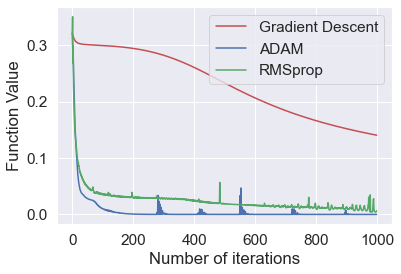

In [92]:
plt.plot(list(range(1000)),costs['Gradient Descent'][:1000],'-r')
plt.plot(list(range(1000)),costs['ADAM'][:1000],'-b')
plt.plot(list(range(1000)),costs['RMSprop'][:1000],'-g')
plt.ylabel('Function Value')
plt.xlabel('Number of iterations')
plt.legend(['Gradient Descent','ADAM','RMSprop'])
plt.show()

In [93]:
def predict_1(params, X, Y):
    accuracy = []
    cache = forward_propogation(params,X)
    Z1 = cache['Z1']
    A1 = cache['A1']
    Z2 = cache['Z2']
    A2 = cache['A2']
    
    diff = Y.T - A2
    for i in range(diff.shape[1]):
        loss = np.max(diff[:,i])*100
        acc = 100 - loss
        accuracy.append(acc)
    
    return accuracy,A2

In [94]:
def predict_2(params,X,Y):
    all_y_pred={}
    accu={}
    for l in list(params.keys()):
        cache = forward_propogation(params[l],X)
        A2 = cache['A2']
        pred_one_hot = np.zeros(A2.T.shape)
        y_pred=[]
        for i in range(A2.T.shape[0]):
            max_value = np.argmax(A2.T[i])
            pred_one_hot[i,max_value] = 1
            if max_value == 0:
                y_pred.append('External Postive-Pole')
            if max_value == 1:
                y_pred.append('External Negative-Pole')
            if max_value == 2:
                y_pred.append('Internal Positive-Pole')
            if max_value == 3:
                y_pred.append('Internal Negative-Pole')
            if max_value == 4:
                y_pred.append('2 Pole Short Circuit')
        
        all_y_pred[l] = y_pred
        correct = 0
        wrong = 0
        
        for i in range(A2.T.shape[0]):
            if (pred_one_hot[i] == Y_one_hot[i]).all():
                print('{} Correct prediction for sample {}'.format(l,i))
                correct +=1
            else:
                print('{} Wrong prediction for sample {}'.format(l,i))
                wrong += 1
        accu[l] = correct/(correct+wrong) * 100

    return accu,all_y_pred

In [99]:
accuracy,predictions= predict_2(final_params,X_test,Y_one_hot)

Gradient Descent Correct prediction for sample 0
Gradient Descent Correct prediction for sample 1
Gradient Descent Correct prediction for sample 2
Gradient Descent Correct prediction for sample 3
Gradient Descent Correct prediction for sample 4
Gradient Descent Correct prediction for sample 5
Gradient Descent Correct prediction for sample 6
Gradient Descent Correct prediction for sample 7
Gradient Descent Correct prediction for sample 8
Gradient Descent Correct prediction for sample 9
Gradient Descent Correct prediction for sample 10
Gradient Descent Correct prediction for sample 11
Gradient Descent Correct prediction for sample 12
Gradient Descent Correct prediction for sample 13
Gradient Descent Correct prediction for sample 14
Gradient Descent Correct prediction for sample 15
Gradient Descent Correct prediction for sample 16
Gradient Descent Correct prediction for sample 17
Gradient Descent Correct prediction for sample 18
Gradient Descent Correct prediction for sample 19
Gradient D

In [100]:
accuracy

{'Gradient Descent': 79.34782608695652,
 'ADAM': 82.6086956521739,
 'RMSprop': 76.08695652173914}

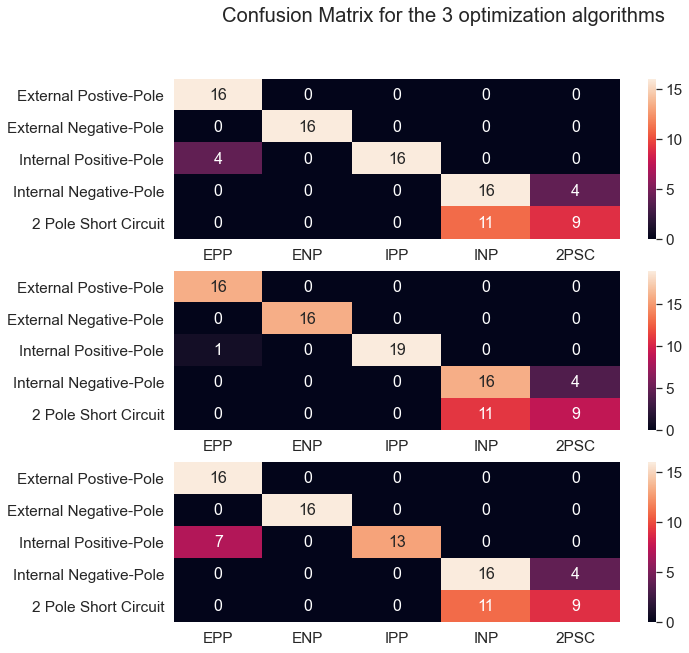

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
cm={}
for k in predictions.keys():

    cm[k] = confusion_matrix(test_pred,predictions[k],labels=['External Postive-Pole','External Negative-Pole',
                                                           'Internal Positive-Pole','Internal Negative-Pole',
                                                           '2 Pole Short Circuit'])
    
#plt.figure(figsize=(20,15))
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,10))
fig.suptitle('Confusion Matrix for the 3 optimization algorithms')

sns.set(font_scale=1.4)

df_cm1 = pd.DataFrame(cm['Gradient Descent'],['External Postive-Pole','External Negative-Pole','Internal Positive-Pole',
                                              'Internal Negative-Pole','2 Pole Short Circuit'],['EPP','ENP','IPP','INP','2PSC'])
sns.heatmap(df_cm1,ax=ax1,annot=True,annot_kws={"size":16})
df_cm2 = pd.DataFrame(cm['ADAM'],['External Postive-Pole','External Negative-Pole','Internal Positive-Pole',
                                  'Internal Negative-Pole','2 Pole Short Circuit'],['EPP','ENP','IPP','INP','2PSC'])
sns.heatmap(df_cm2,ax=ax2,annot=True,annot_kws={"size":16})
df_cm3 = pd.DataFrame(cm['RMSprop'],['External Postive-Pole','External Negative-Pole','Internal Positive-Pole',
                                     'Internal Negative-Pole','2 Pole Short Circuit'],['EPP','ENP','IPP','INP','2PSC'])
sns.heatmap(df_cm3,ax=ax3,annot=True,annot_kws={"size":16})
    
plt.show()

{'Gradient Descent': 79.34782608695652,
 'ADAM': 82.6086956521739,
 'RMSprop': 76.08695652173914}